## Section 1: Introduction

Welcome our tutorial on Bayesian Networks (Bayes nets)! We're hoping by the time that you have finished the tutorial you will get a sense for the following:
  * What they are and what classes of problems they can be used to solve
  * How to implement several common useful operations with a Bayes net
  * Limitations that the approaches involving Bayes Nets may have

We begin our notebook with some preliminaries (and a fun motivating example) and then move on to describing some preliminary code structures that we'll use throughout the reset of the tutorial.  We then provide some relevant excerpts from our implementation, centered around explaining functionality that we're going to use to solve the problems that our motivating example poses. We then display the potential of a Bayes net against our motiving example. Finally, we point out some limitations of using a Bayes net (primarily the scalability of the approach) to solve our motivating example and discuss (and potentially show) possible ways to address these limitations.
  

### Section 1.1: What exactly is a Bayes Net and what is it good for?

At a high level, a Bayes net is a graphical model that we can use to represent the relationship between different random variables.

TODO(nathan): link this section with the math that follows

In this section we further explain how the underlying math is going to work.
Suppose the space of all state is $X$, observations are $O$, results are $Y$, and hidden states are $X^H$.

We are trying to compute the joint pmf over the entire space: $P(X)$.

**Step 1**: apply chain rule to the joint distribution of $X$.

$$ P(X) = P(Y, O, X^H) = \prod\limits_{\text{$x$ in $X$}}P(x \,| \, \text{parents of $x$} )$$

That’s not phenomenally useful yet because this requires a probability mass function for each of the states - hidden and not.

**Step 2**: Apple value elimination by marginalization: the idea is to marginalize the hidden state pmfs out - we only really need to calculate the pmf over the variables we are interested in - observations and results.

$$ P(Y, O) =  \big(\prod\limits_{Y_i}^{m} P(Y_i) \big) \sum\limits_{X_1^H} \big( \prod P(\text{has $X_1^H, Y_i, O_i$ but not $X_js$}) \big)  \sum\limits_{X_2^H} \big( \prod P(\text{has $X_2^H, X_1^H, Y_i, O_i$ but not $X_js$}) \big) \sum \big(...\big)$$

**Step 3**: Condition on observations at current step $O^i = \{o^i_1, o^i_2, ...\}$:

$$ P(Y|O) = \frac{P(Y, O)}{P(O)} = \eta \sum\limits_{X_H}P(Y, X^H, O^i) $$

(we don't actually need to compute $P(O)$ since we will be computing belief assignment over all results, so $P(O)$ becomes a normalization factor. )

**Step 4**: find maximal assignments. Now, if what we need is to get the most likely event, computing maximums by augmenting Step 2 and 3 is indeed a more effcient way to do that. However, if we compute PMFs for each result $Y$, that taking the maximum over all Ys is easer. As in:

If the PMF $P(Y|O)$ is computed, most likely $y$ can be computed by taking $\text{max}(P(Y|O))$. If we don't have the PMF, we can copmute the maximum directly:

$$max(P(Y, O)) =  \big(\prod\limits_{Y_i}^{m} P(Y_i) \big) \max\limits_{X_1^H} \big( \prod P(\text{has $X_1^H, Y_i, O_i$ but not $X_js$}) \big)  \max\limits_{X_2^H} \big( \prod P(\text{has $X_2^H, X_1^H, Y_i, O_i$ but not $X_js$}) \big) max \big(...\big)$$



**Step 5**: Bucket elimination - simplify 2 and 3 to directly computing results out of observations. At j-th sum, instead sum over the the possible values of j-th hidden variable.





In this notebook, we aim to showcase the following features:

* Defining generic Node and Bayes Net classes.
* Creating and disaplying bayes nets (manually generated and randomly generated).
* Given the observations, compute and display the posterior distribution for each node (likely through basic enumeration - enumerate node, chain rule to its parents, etc)
* Given the observations, compute and display the most likely configuration of the entire network (compute last point, take max over each distribution (?)kind of like viterbi over full system).
* Given observations and a specific query node, compute the most likely state of that node (this should still require computing posterior density functions for each intermediate node, i believe).


Everything above has been agnostic to which nodes are considered as observation nodes and query nodes.
* Let's now define specific nodes as observations and specific nodes as attacks. Perform bucket elimination over the system by marginalizing hidden variables.
* Use bucket elimination to efficiently compute joint probability distribution over variables of interest only.
* Show that bucket elimination doesn't work for a large number of nodes.
* Potential stretch goal: use monte carlo sampling to approximate posterior distributions.

-------------------

As of now, we are still unclear whether we plan to use a specific class to represent the Bayes net (as in the next cell), or use lists of Nodes (as in the subsequent cells). We'll need to decide whether we want methods to be  stand-alone or as part of a class. 



In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import random

In [ ]:
# Draft of Bayes Net class
class Bayes_Net():
    """ Representation of a Baysian Network.
    
    Attributes:
    nodes (dict{str->Node}): dict mapping each nodes name to its node object.
    graph (DiGraph): network x visual representation of the bayes net.
    """

    nodes = None
    graph = None
    
    def __init__(self, nodes, graph):
        """ Creates the Bayesian Network
        
        Parameters:
        nodes (dict{name(str) -> node(Node)}): dict mapping each node's name to its node object.
        """
        self.nodes = nodes
        self.graph = graph

        
        
    def add_observation(self, node, observation):
        """ Adds an observation of a node to the network.
        
        Parameters:
        node (Node): node that was observed
        observation ( ): value of the observation
        """
        raise NotImplementedError()
        
        
    def remove_observation(self, node):
        """ Removes an observation from the network.
        
        Parameters:
        node (Node): node thats observation is being removed
        """
        raise NotImplementedError()
        
        
    def add_node(self, Node):
        """ Adds a node to the nework. Must be a leaf node.
        
        Parameters:
        node (Node): node to be added to the network
        """
        raise NotImplementedError()
        
        
    def remove_node(self, node):
        """ Remove a node from the network. Must be a leaf node (it would affect child nodes otherwise).
        
        Parameters:
        node (Node): leaf node to be removed from the network
        """
        raise NotImplementedError()
        
    
    def get_MAP_estimate(self, o_nodes=[]):
        """ Compute the most likely configuration of the network given the evidence.
        o_nodes (list(Node)): List of observed nodes (Node value =\= None)
        """

        raise NotImplementedError()
        
        
    def get_posterior(self, q_nodes, o_nodes=[]):
        """Compute the posterior distribution for the query nodes (q_nodes)
            given the observed nodes (o_nodes).
            
        Parameters:
        q_nodes (: Set of nodes for which the posterior is computed
        o_nodes (set(Node)): Set of observed nodes.
        """
        raise NotImplementedError()


    def bucket_elimination(self, o_nodes, attack_nodes):
       """
        Knowing which variables are observations and which are the results (attacks), 
        perform bucket elimination on the bayes net. 
        This simplifies the computation in the case where hidden nodes reamin unobservable, 
        and observations are asummed to occur for a given set of nodes.
        This allows for faster subsequent computation.

        Parameters: 
        o_nodes: a list of string names for observation nodes
        attach_nodes: a list of string names for attack nodes


       """
        
        
    def draw_net(self):
        """Draws a diagram of the network."""
        nx.draw(self.graph, with_labels=True, pos = nx.get_node_attributes(self.graph,'pos'), node_color = 'orange', node_size = 500)
        

In [ ]:
# Node class mock-up
# TODO(nathan) move this to a separate file when implementing

# Current assumption: nodes can be either true or false (rather than A B C)
# Current assumption: store only the probability that the nodes is true
class Node:
  """
  Represents a random variable in the Bayes network.

  Attributes:
    name (str): name of the node
    probabilities (pd.DataFrame): conditional probability table
    parents (List[Node]): all parents of the node
  """
  name = None
  probabilities = None
  parents = None
  # values = None
  
  # TODO(nathan) think about whether optional probabilities make sense

  def __init__(self, name, probabilities, parents=None):
    """
    Constructs a node directly from the conditional probability table (CPT).

    Args:
      name (str): node name
      probabilities (pd.DataFrame): likelihoods of node being true ordered by
       cartesian product of parents
      parents (Optional[List[Node]]): parents in the conditional probability table
    """
    # for nodes without parents, probabilities is just [0.95], P(X=true)
    self.name = name
    self.probabilities = probabilities 
    self.parents = parents
    if parents == None:
      self.parents = []

    

  @classmethod
  def from_inhibitions(cls, name, parents, inhibition_values):
    """
    Constructs a CPT from a list of inhbiting probabilties from parents.

    Args:
      name (str): node name
      parents (List[Node]): parents in the conditional probability table
      inhibition_values (List[float]): likelihood of node being false given
        parent is true, in order of parents provided
    
    """
    raise NotImplementedError()

  def __str__(self):
    """Show the conditional probability table."""
    res = "Node name: " + self.name + "\n" + "Node Parents: " + str([parent.name for parent in self.parents]) + "\n" + str(self.probabilities);
    res = res + "\n---------------------\n"
    return res

  def __repr__(self):
    """Show some basic info about the node."""
    return '{name:'+self.name+', probabilities:'+str(self.probabilities) + ', parents:' + str(self.parents) + '}'


def generate_network(n_attacks=2, n_subsystems=3, n_workstations=6):
  """
  Make an example network with the number of components.

  Args:
    n_attacks (int): number of "attack" random variables
    n_subsystems (int): number of "subsystem" random variables, assuming a single subsystem layer
    n_workstations (int): number of "workstation" random variables

  Returns:
    Bayes_Net: a bayes net with the specified random variables.

  """
  # i am also building a graph that could be used to represent the bayes net at the same time
  G=nx.DiGraph()
  graph_width = max(n_attacks, n_subsystems, n_workstations)


  # handle inadequate inputs
  if n_attacks == 0:
    raise ValueError("Need at least one attack!")
  if n_workstations == 0:
    raise ValueError("Need at least one workstation!")

  # generate attack nodes
  attack_nodes = []
  for i in range(n_attacks):
    G.add_node('a'+str(i), 
               pos = (graph_width * (i+0.5)/n_attacks, 4),
               color = 'r')
    attack_nodes.append( Node('a'+str(i), 
                              generate_random_cpt( [] )
                              ) )
  # generate subsystem nodes
  subsystem_nodes = []
  for i in range(n_subsystems):
    # a random sample of 1 through n attacks
    G.add_node('s'+str(i), 
               pos = (graph_width * (i+0.5)/n_subsystems, 2),
               color = 'b')
    sample_attacks = random.sample(range(0, n_attacks), random.randint(1, n_attacks))
    for j in sample_attacks:
        G.add_edge('a' + str(j), 's' + str(i))
    subsystem_nodes.append(Node('s'+str(i), 
                                generate_random_cpt(['a' + str(j) for j in sample_attacks ]),
                                parents = [attack_nodes[j] for j in sample_attacks]
                                ) )
    
  # generate workstation nodes
  workstation_nodes = []
  for i in range(n_workstations):
    G.add_node('w'+str(i), 
               pos = (graph_width * (i+0.5)/n_workstations, 0),
               color = '')
    
    if n_subsystems != 0:
      sample_attacks = random.sample(range(0, n_attacks), random.randint(0, n_attacks//2)) # sample some attacks
      sample_subsystems = random.sample(range(0, n_subsystems), random.randint(1, n_subsystems)) # sample at least one subsystem
      for j in sample_attacks:
        G.add_edge('a' + str(j), 'w' + str(i))
      for j in sample_subsystems:
        G.add_edge('s' + str(j), 'w' + str(i))
      subsystem_nodes.append(Node('w'+str(i), 
                                  generate_random_cpt(['a' + str(j) for j in sample_attacks ] + ['s' + str(j) for j in sample_subsystems ]),
                                  [attack_nodes[j] for j in sample_attacks] + [subsystem_nodes[j] for j in sample_subsystems]
                                  ) )
    else:
      # there are no subsystems, sample just attacks
      sample_attacks = random.sample(range(0, n_attacks), random.randint(1, n_attacks))
      for j in sample_attacks:
        G.add_edge('a' + str(j), 'w' + str(i))
      workstation_nodes.append(Node('w'+str(i), 
                                generate_random_cpt(['a' + str(j) for j in sample_attacks ]),
                                [attack_nodes[j] for j in sample_attacks]
                                ) )

  dictionary_of_nodes = dict()
  all_nodes = attack_nodes + subsystem_nodes + workstation_nodes
  for n in all_nodes:
    dictionary_of_nodes[n.name] = n
  return Bayes_Net(dictionary_of_nodes, G)

  

def generate_random_cpt(parents=[]):
  """
  Make a random cpt from from a given list of parents, assuming that the value of nodes are either true or false.

  Args:
    parents (list of str): list of parents; can be empty

  Returns:
    pandas dataframe: a cpt in a dataframe representation;

  """
  df = pd.DataFrame(columns = parents + ['prob'])
  ar = [False] * len(parents)
  # we need to create 2^parents rows - the cpt table.
  # these few lines generate all combinations of false / true statements 
  for i in range(2**len(parents)):
    df.loc[i] = ar + [random.random()]
    j = 0
    while j < len(parents) and True:
      if ar[j] == False:
        ar[j] = True
        ar[0:j] = [False] * (j)
        break
      else:
        j+=1
  return df

    


  # raise NotImplementedError()

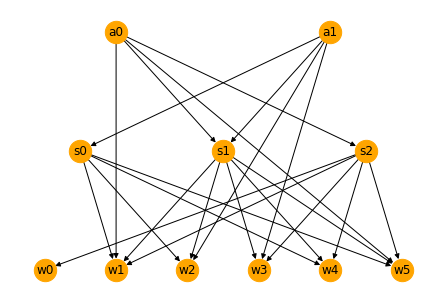

In [ ]:
a = generate_network()
a.draw_net()

In [ ]:
def generate_network(n_attacks=2, n_subsystems=3, n_workstations=6):
  """
  Make an example network with the number of components.

  Args:
    n_attacks (int): number of "attack" random variables
    n_subsystems (int): number of "subsystem" random variables
    n_workstations (int): number of "workstation" random variables

  Returns:
    Network: a bayes net with the specified random variables.

  """
  # assuming a single layer within the subsystems
  attack_names = ["a"+str(i) for i in range(n_attacks)]
  attack_nodes = []
  for i in range(n_attacks):
    



In [ ]:
parents = []
# if len(parents) > 0:
print(f"Node Parents: {[parent for parent in parents]}")
# else:
  # print("No Parents")


Node Parents: []


### Basic Example

Some blurb providing context about the example.

Present the example more formally (i.e. provided a diagram and CPTS for all nodes)

In [ ]:
# Basic Example

# Different attacks
attack_1 = Node("attack_1", 1.0e-2)
attack_2 = Node("attack_2", 3.0e-3)

# subsytem
subsystem_1 = Node("subsystem_1", np.array([0.7, 0.2]), parents=[attack_1])

# workstations
# Note that we're treating workstations as components in this example
workstation_1 = Node("workstation_1", np.array([0.4, 0.8]), parents=[attack_2])
workstation_2 = Node.from_inhibitions("workstation_2", [attack_2, subsystem_1], np.array([0.1, 0.2]))

network = Network([attack_1, attack_2, subsystem_1, workstation_1, workstation_2])
draw_network(network)

#### Posterior Distribution

We can query the network for the probability distribution of variables given specific observations. In this example, we are intereseted in the likelihood of each attack given different observation sequences.

In [ ]:
P_attack_1 = get_likelihood(network, "attack_1", {"workstation_1": True})
print('Likelihood of attack 1 conditioned on workstation 1 failing: {}'.format(attack_1))
P_attack_2 = get_likelihood(network, "attack_2", {"workstation_2": True, "subsystem_1": False})
print('Likelihood of attack 2 conditioned on workstation 1 failing: {}'.format(attack_2))

#### Most Likely Configuration of Network

We can also query the network to assign the most likely values of each random variable given certain observations.

In [ ]:
# Same observations as the first example
map_assignments = get_map(network, {"workstation_1": True})
print("Most likely states given observation: ")
display_assignments(network, map_assignments)
# Same observations as the second example
map_assignments = get_map(network, {"workstation_2": True, "subsystem_1": False})
print("Most likely states given observation: ")
display_assignments(network, map_assignments)

### Full Example

Some blurb about how we generate a more convincing network.

In [ ]:
large_network = generate_bayes_net(n_attacks=3, n_subsystems=5, n_workstations=30)
attacks = ["attack_{}".format(i + 1) for i in range(3)]
draw_network(large_network)

#### Exact inference

Some blurb about how we can still perform similar queries as before on larger networks, but there's a limit

In [ ]:
# some method to make 
observations_1 = make_random_observations(large_network)
print("Observations: {}")

for attack in attacks:
  print("Likelihood of {}: {}".format(attack, get_likelihood(large_network, attack, observations_1)))
  assignments = get_map(large_network, observations_1)
  print("Most likely configuration of {}:".format(attack))
  display_assignments(large_network, assignments)

#### Approximating the posterior distribution (stretch goal?)

Some blurb about how for larger networks, approximating the posterior via monte-carlo sampling can be more efficient

In [ ]:
sample_sizes = [100, 1000, 10000]

exact_likelihood = get_likelihood(large_network, attack, observations_1)

for num_samples in sample_sizes:
  approx_likelihood = get_approx_likelihood(large_network, attack, observations_1, samples=num_samples)
  percent_error = abs(exact_likelihood - approx_likelihood) / (exact_likelihood)
  print("With {} samples: {} (% error: {})".format(num_samples, approx_likelihood, percent_error * 100))

In [ ]:
def get_most_likely_attack(bayes_network, observations):
  """
  Return the most likely attack that based on provided observations.

  Args:
    bayes_network (bayes_net): 
    observations (dict): 

  Returns:
  most likely attack (Node)

  """

def get_most_likely_assignment(bayes_network, observations):
  """
  Return the most likely assignment for each subsystem and attack based on observations

  Args:
    bayes_network (bayes_net): 
    observations (dict): 

  Returns:
    a bayes network with each subsystem 

  """